In [78]:
import requests
import pandas as pd
import numpy as np

# Azure functions test

### POST json, receive csv

In [79]:
# defining the api-endpoint 
# API_ENDPOINT = "http://localhost:7071/api/brown"
API_ENDPOINT = "https://holmens.azurewebsites.net/api/brown"
# API_KEY = u"vtesm2s3CpWR3kJ7BGhRfJAauwn5qf%2FeeLmVP5PEuYq2Cz0ea3udVw%3D%3D"

"""
Turns into?
vtesm2s3CpWR3kJ7BGhRfJAauwn5qf%252FeeLmVP5PEuYq2Cz0ea3udVw%253D%253D
"""

# data to be sent to api
data = '{"corr":"[[1.0, -0.6, -0.6], [-0.6, 1.0, 1.0], [-0.6, 1.0, 1.0]]","n":100,"t":60}'
params = {'code':API_KEY}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, data=data) 
# r = requests.post(url = API_ENDPOINT, params=params, data=data) 

# check the response status code
print(r.status_code)

200


In [80]:
print(r.url)

https://holmens.azurewebsites.net/api/brown


In [81]:
with open('../Data/szenarios.csv','w') as fd:
    fd.write(r.text)

In [82]:
df = pd.read_csv('../Data/szenarios.csv')
df.head()

,0,1,2,N,t
0,-0.932093,1.823023,1.823023,0,0
1,0.536779,-0.048778,-0.048778,0,1
2,-0.962922,1.276743,1.276743,0,2
3,-1.775512,0.472269,0.472269,0,3
4,-0.939482,0.294800,0.294800,0,4


### Verify

In [83]:
df[['0', '1', '2']].corr()

,0,1,2
0,1.000000,-0.591289,-0.591289
1,-0.591289,1.000000,1.000000
2,-0.591289,1.000000,1.000000


In [84]:
df[['0', '1', '2']].var()

0    1.012942
1    0.975446
2    0.975446
dtype: float64

In [85]:
df[['0', '1', '2']].mean()

0    0.006917
1   -0.005115
2   -0.005115
dtype: float64

### Note!

In [86]:
np.linalg.eig(np.array([[1.0, -0.6, -0.6], [-0.6, 1.0, 1.0], [-0.6, 1.0, 1.0]]))[0]

array([ 2.48488578e+00,  5.15114220e-01, -2.98216217e-32])

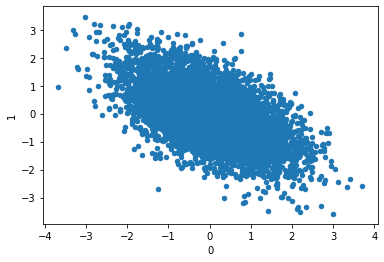

In [90]:
df.plot.scatter(x='0',y='1')

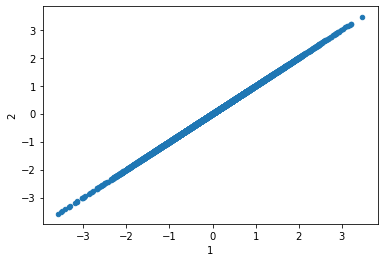

In [89]:
df.plot.scatter(x='1',y='2')